In [1]:
import tensorflow as tf
import model
import input
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import Image
import numpy as np
%matplotlib inline

In [22]:
def resize_image(img, size):
    pil_img = Image.fromarray(img)
    pil_img = pil_img.resize(size)
    img = np.array(pil_img.getdata(), dtype=img.dtype)
    return img.reshape(size+[3])

In [42]:
tf.reset_default_graph()

In [43]:
sess = tf.InteractiveSession()

In [44]:
example = tf.placeholder(tf.float32, shape=[None, None, None, 3])
x = tf.image.resize_images(example, [32, 32]) 
y = model.model(x)

tf.global_variables_initializer().run()

In [45]:
saver = tf.train.Saver()
saver.restore(sess, "../saved_models/model.ckpt")

Cat............. Dog
[[ 0.93203819 -0.93204331]]
[[-1.39278615  1.3927809 ]]
[[ 0.21702783 -0.21703334]]
[[-0.81360173  0.81359673]]
[[ 0.46087325 -0.46087843]]
[[-1.56814134  1.56813598]]
[[ 0.67841542 -0.6784209 ]]
[[-0.95921689  0.95921272]]
[[-0.11009915  0.11009438]]
[[-0.30392498  0.30391914]]
[[-0.00135437  0.00134919]]
[[-0.55098844  0.55098319]]
[[ 0.30287993 -0.30288389]]
[[-1.63410938  1.63410485]]
[[ 1.32399893 -1.32400429]]
[[-0.16447911  0.16447389]]
[[ 0.93827564 -0.93828088]]
[[-1.14894867  1.14894342]]
[[-0.04767878  0.04767399]]
[[-0.75086862  0.75086367]]
[[ 0.42081776 -0.42082256]]
[[-1.22386694  1.22386289]]
[[ 2.28157711 -2.28158259]]
[[-1.1198833   1.11987877]]
[[ 0.60989881 -0.6099031 ]]
[[-0.97727841  0.97727305]]
[[-0.39504704  0.39504132]]
[[-0.03426756  0.03426255]]
[[ 0.42369613 -0.42370161]]
[[-0.97378975  0.97378546]]


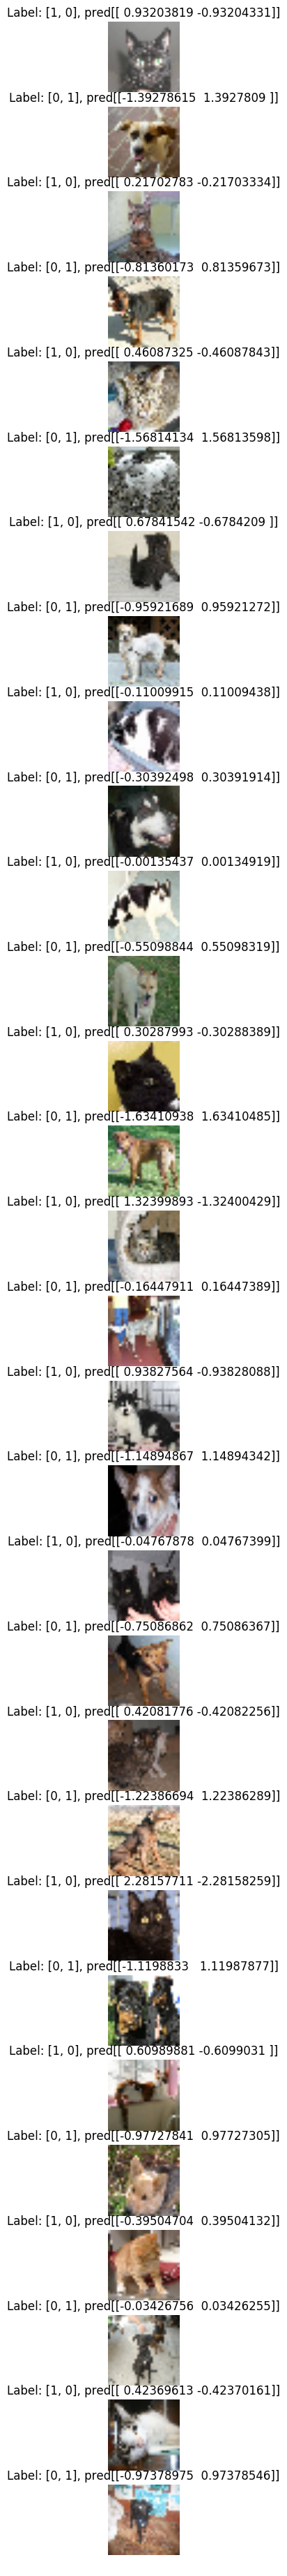

In [50]:
filenames, labels = input.get_filenames_labels(12500, .95, False, "../train")
plt.subplots(figsize=(50, 50))

print("Cat............. Dog")
for i in range(30):
    orig_img = mpimg.imread(filenames[i])
    imgs, pred = sess.run([example, y], feed_dict={example: [orig_img]})
    
    img = resize_image(orig_img, [32, 32])
    
    plt.subplot(32, 1, i+1)
    plt.title("Label: {}, pred{}".format(labels[i], pred))
    plt.axis('off')
    plt.imshow(img)
    print(pred)
    
plt.show()

In [54]:
example = tf.placeholder(tf.float32, shape=[None, None, None, 3])
x = tf.image.resize_images(example, [50, 50])

print("x", x)
shape = x.get_shape().as_list()
print("x size", shape[1] * shape[2] * shape[3])

conv1 = tf.contrib.layers.convolution2d(x, 12, [6, 6], [1,1], "VALID",
                                        weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                        biases_initializer=tf.constant_initializer(0.0),
                                        activation_fn=tf.nn.relu)
conv1 = tf.nn.max_pool(conv1, [1, 4, 4, 1], [1, 2, 2, 1], 'VALID')
conv1 = tf.nn.lrn(conv1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')

shape = conv1.get_shape().as_list()
print("conv1 size", shape[1] * shape[2] * shape[3])
print(conv1)

last_conv = tf.contrib.layers.convolution2d(conv1, 24, [5,5], [1,1], "VALID",
                                            weights_initializer=tf.contrib.layers.xavier_initializer_conv2d(),
                                            biases_initializer=tf.constant_initializer(0.0),
                                            activation_fn=tf.nn.relu)
last_conv = tf.nn.max_pool(last_conv, [1, 3, 3, 1], [1, 2, 2, 1], 'VALID')
last_conv = tf.nn.lrn(last_conv, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm2')

print(last_conv)

shape = last_conv.get_shape().as_list()
reshaped_last_conv = tf.reshape(last_conv, [-1, shape[1] * shape[2] * shape[3]])

print(reshaped_last_conv)

fully_connect = tf.contrib.layers.fully_connected(reshaped_last_conv, 100,
                                                 weights_initializer=tf.contrib.layers.xavier_initializer())

y = tf.contrib.layers.fully_connected(fully_connect, 2,
                                      biases_initializer=tf.constant_initializer(0.0),
                                      weights_initializer=tf.contrib.layers.xavier_initializer(),
                                      activation_fn=None)

('x', <tf.Tensor 'ResizeBilinear_4:0' shape=(?, 50, 50, 3) dtype=float32>)
('x size', 7500)
('conv1 size', 5292)
Tensor("norm1_3:0", shape=(?, 21, 21, 12), dtype=float32)
Tensor("norm2_3:0", shape=(?, 8, 8, 24), dtype=float32)
Tensor("Reshape_3:0", shape=(?, 1536), dtype=float32)
